# MuTe 2D 

Este código reconstruye la dirección de arribo de la partícula a partir de la incidencia en dos pixeles, uno en el panel superior y otro en el inferior, tal y como se muestra en la figura  

![text](Figuras/PlacasMuonScopio.png)


In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

Defino la función para validar los pixeles 

In [14]:
def ValidoPixel(XPixel, YPixel, NBar) :
    if XPixel < 0 or XPixel > NBar :
         print (" error en Pixel X  ")
    if YPixel < 0 or YPixel > NBar :
         print (" error en Pixel Y  ")
    return 

In [15]:
# Función que pinta los paneles y los pixeles
# PanelArriba y PanelAbajo son dos arreglos bidimensionales NBar x NBar
def PintoPaneles(PanelArriba,PanelAbajo) :
    plt.subplot(1, 2, 1)
    plt.xlabel('i')
    plt.ylabel('j')
    plt.title('Panel Frontal')
    plt.imshow(PanelArriba)
    plt.subplot(1, 2, 2)
    plt.xlabel('k')
    plt.ylabel('l')    
    plt.title('Panel Posterior')
    plt.imshow(PanelAbajo)
    # dibujo los paneles
    plt.show()
    return

In [16]:
def DireccionArribo(XPixelArriba, YPixelArriba, XPixelAbajo, YPixelAbajo, SeparacionPaneles, AnchBar ):
    global XArribo, YArribo, ZArribo, cosAlpha, cosBeta, cosGamma
    import math
    XArribo = AnchBar*(XPixelAbajo -XPixelArriba)
    YArribo = AnchBar*(YPixelAbajo -YPixelArriba)
    ZArribo = SeparacionPaneles
    modulo = math.sqrt(XArribo**2 +YArribo**2 +ZArribo**2)
    cosAlpha = XArribo/modulo
    cosBeta = YArribo/modulo
    cosGamma = ZArribo/modulo
    print ("X Arribo =", XArribo, "    Y Arribo =", YArribo, "    Z Arribo =", ZArribo)
    print ("los cosenos directores")
    print ("coseno Alpha =", cosAlpha, "; coseno Beta =", cosBeta, "; coseno Gamma =", cosGamma)
    return 

## Paneles

Caracterizo los dos paneles paralelos, separados una distancia $\texttt{SeparacionPaneles}$ (medida en cm) conformados con $\texttt{NBar}$ = número de Barras, cada una con un ancho $\texttt{AnchBar}$ (medida en cm)

In [17]:
# NBar = input("Numero de Barras ? ")
# AnchBar = input("Ancho de las Barras (cn) ? ")
# SeparacionPaneles = input("Separacion de los Paneles (cm) ? ")
NBar = 11 
AnchBar = 5 # cm
SeparacionPaneles = 100 # cm

Pinto los paneles

In [18]:
# limpio el contenido de los paneles
PanelSuperior = np.zeros((NBar,NBar)) # i j
PanelInferior = np.zeros((NBar,NBar)) # k l

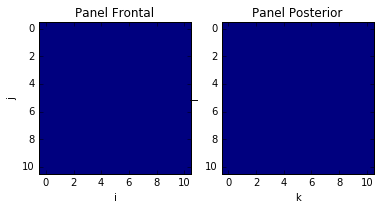

In [19]:
PintoPaneles(PanelSuperior,PanelInferior)

## Pixeles de Paneles
Inserte los pixeles en los paneles

Panel superior

In [20]:
# XPixelArriba = input("Pixel X panel superior ? ")
# YPixelArriba = input("Pixel X panel inferior ? ")
XPixelArriba= 3
YPixelArriba= 5
ValidoPixel(XPixelArriba,YPixelArriba,NBar)

Panel inferior

In [21]:
# XPixelAbajo = input("Pixel X panel superior ? ")
# YPixelAbajo = input("Pixel X panel inferior ? ")
XPixelAbajo= 9
YPixelAbajo= 3
ValidoPixel(XPixelAbajo,YPixelAbajo,NBar)

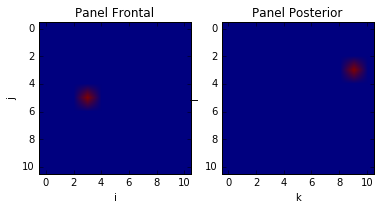

In [22]:
# limpio el contenido de los paneles
PanelFrontal = np.zeros((NBar,NBar)) # i j
PanelPosterior = np.zeros((NBar,NBar)) # k l
# ilumino las celdas de los paneles
PanelFrontal[YPixelArriba,XPixelArriba]= 10.
PanelPosterior[YPixelAbajo,XPixelAbajo] = 10.
PintoPaneles(PanelFrontal,PanelPosterior)

Calculo la dirección de arribo en términos de los cosenos directores

In [23]:
DireccionArribo(XPixelArriba, YPixelArriba, XPixelAbajo, YPixelAbajo, SeparacionPaneles,AnchBar )

X Arribo = 30     Y Arribo = -10     Z Arribo = 100
los cosenos directores
coseno Alpha = 0.28603877677367767 ; coseno Beta = -0.09534625892455922 ; coseno Gamma = 0.9534625892455922


ilumino todos los pixeles con direcciones equivalentes

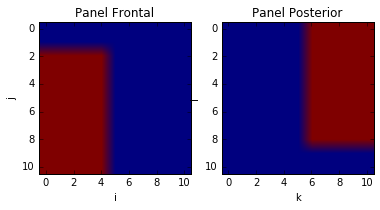

In [24]:
# limpio el contenido de los paneles
PanelFrontal = np.zeros((NBar,NBar)) # i j
PanelPosterior = np.zeros((NBar,NBar)) # k l
# ilumino los puntos que corresponden a direcciones equivalentes
DeltaXIngreso = XPixelAbajo -XPixelArriba
DeltaYIngreso = YPixelAbajo -YPixelArriba
#
for i in range(NBar)  :
    for j in range(NBar)  :
        if i+DeltaXIngreso < NBar  and i+DeltaXIngreso >= 0 :
            if j+DeltaYIngreso < NBar  and j +DeltaYIngreso >= 0 :
                PanelFrontal[j,i]= 10.
                PanelPosterior[j+DeltaYIngreso,i+DeltaXIngreso]= 10.
            else :continue
        else : continue
# Pinto los paneles            
PintoPaneles(PanelFrontal,PanelPosterior)